<a href="https://colab.research.google.com/github/dhiraludvia/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. BUSINESS UNDERSTANDING**

Pada dataset kali ini, dataset yang digunakan adalah dataset pelanggan yang gunakan provider kami. didalamnya terdapat beberapa kolumn data yang disajikan sebagai berikut,

- state ( Negara)                           
- account_length (berapa lama akun pelanggan digunakan)                  
- area_code (kode wilayah)                      
- international_plan (apakah pelanggan memiliki atau tidak memiliki paket rencana internasional)              
- voice_mail_plan(apakah pelanggan memiliki atau tidak memiliki paket rencana voicemail)                 
- number_vmail_messages(jumlah pesan voicemail yang diterima oleh pelanggan)          
- total_day_minutes(total menit yang dihabiskan pelanggan untuk panggilan pada periode hari)             
- total_day_calls(total panggilan yang dilakukan oleh pelanggan pada periode hari)                 
- total_day_charge (total biaya yang dikenakan kepada pelanggan untuk penggunaan layanan pada periode hari)               
- total_eve_minutes( total menit yang dihabiskan pelanggan untuk panggilan pada tiap hari)              
- total_eve_calls(total panggilan yang dilakukan oleh pelanggan setiap hari)                 
- total_eve_charge(biaya yang dikenakan kepada pelanggan untuk panggilan, pesan teks, atau penggunaan layanan lainnya yang dilakukan setiap hari)               
- total_night_minutes(total menit panggilan yang dilakukan oleh pelanggan pada jam-jam malam hari)            
- total_night_calls(jumlah panggilan yang dilakukan oleh pelanggan pada jam-jam malam hari)              
- total_night_charge (dapat mencerminkan biaya yang dikenakan kepada pelanggan untuk panggilan, pesan teks, atau penggunaan layanan lainnya yang dilakukan pada periode malam hari)             
- total_intl_minutes (total durasi waktu (dalam menit) yang dihabiskan oleh pelanggan untuk melakukan panggilan ke tujuan internasional)             
- total_intl_calls (jumlah total panggilan internasional)                 
- total_intl_charge (biaya panggilan untuk internasional)              
- number_customer_service_calls (jumlah panggilan atau kontak yang diterima oleh departemen layanan)   
- churn (berhenti/ berpindah)                           

# **2. PREPROCESSING**


#Import Library & Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
warnings.filterwarnings('ignore')

##Data Train

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn-Data Test.csv to Churn-Data Test.csv
Saving Churn-Data Train.csv to Churn-Data Train.csv


In [ ]:
df = pd.read_csv("Churn-Data Train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df.shape

(4250, 20)

terdapat 20 kolom dan 4250 baris pada data yang kita gunakan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Ada beberapa features yang harus kita ubah pada tipe datanya yaitu churn, international_plan, voice_mail_plan menjadi integer bernilai 0 dan 1.

In [ ]:
catregoriz = ['churn','international_plan','voice_mail_plan']

def categorize_churn(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return 'NaN'  # Menggunakan float('nan') untuk menghasilkan nilai NaN yang valid

# Menggunakan fungsi apply pada setiap kolom yang ingin diubah
for col in catregoriz:
    df[col] = df[col].apply(categorize_churn)

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


##Data Test

In [ ]:
df2 = pd.read_csv("Churn-Data Test.csv")
df2.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df2.shape

(750, 20)

Terdapat 750 baris data dan 19 kolumn untuk data test yang akan digunakan

In [ ]:
catregoriz2 = ['international_plan','voice_mail_plan']

def categorize_churn2(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return 'NaN'  # Menggunakan float('nan') untuk menghasilkan nilai NaN yang valid

# Menggunakan fungsi apply pada setiap kolom yang ingin diubah
for col in catregoriz2:
    df2[col] = df2[col].apply(categorize_churn2)

In [ ]:
df2.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


# **3. EXPLORATORY DATA ANALYSIS**

# Target (Churn)

0    85.929412
1    14.070588
Name: churn, dtype: float64


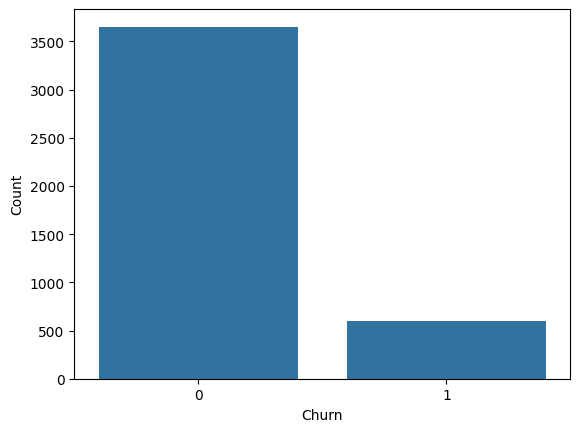

In [ ]:
# Membuat diagram batang menggunakan Seaborn
sns.countplot(x='churn', data=df)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Churn')
plt.ylabel('Count')

# Menampilkan plot
print(df.churn.value_counts()/len(df)*100)
plt.show()

Dari hasil grafik diatas, terlihat bahwa 85,9% memutuskan tidak berpindah atau tetap pada prodiver yang sama dan 14,1% memutuskan untuk berpindah ke provider lain.

##Data Train

Membuat fungsi untuk menampilkan data kategorik

In [ ]:
def visualize_category_with_numeric_target(cat_col = None, target_col=None, data=df, orient="horizontal"):
  df_agg = data.groupby(cat_col)[target_col].count().sort_values(ascending=False)
  display(df_agg)
  if orient == "horizontal":
    fig = sns.barplot(x=df_agg.index,
                      y=df_agg.values)
  elif orient == "vertical":
    fig = sns.barplot(y=df_agg.index,
                      x=df_agg.values)

  for i in fig.containers:
    fig.bar_label(i,)

  plt.show()
  return fig

1. State

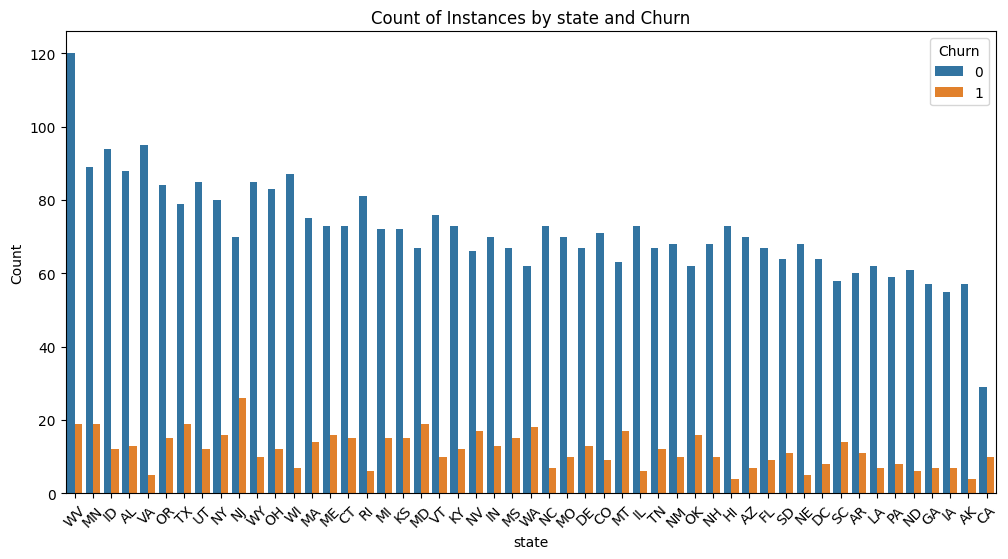

In [ ]:
def visualize_countplot(data, cat_col):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=cat_col, hue='churn', data=data, order=data[cat_col].value_counts().index)
    plt.title(f'Count of Instances by {cat_col} and Churn')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Churn', loc='upper right')
    plt.show()

# Assuming df is your DataFrame
visualize_countplot(data=df, cat_col="state")


pelanggan dengan memilih tidak churn tertinggi dari negara WV dan negara yang memilih untuk churn tertinggi yaitu dari negara NJ

2. Area Code

area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: churn, dtype: int64

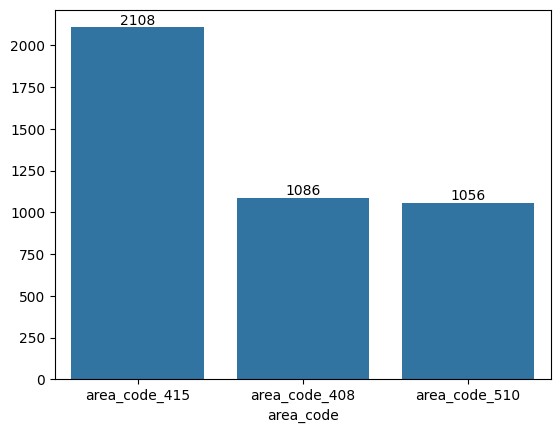

<Axes: xlabel='area_code'>

In [ ]:
visualize_category_with_numeric_target(cat_col="area_code",
                                       target_col = "churn",
                                       data = df,
                                       orient="horizontal")

Pelanggan dengan churn tertinggi dari area_code 415

3. International Plan

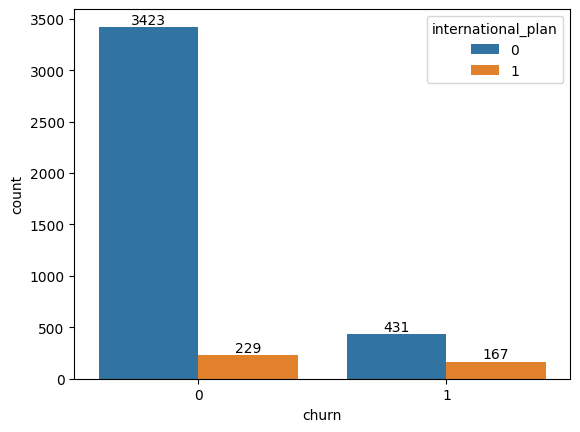

In [ ]:
ax = sns.countplot(x=df["churn"],
              hue=df["international_plan"])
for i in ax.containers:
    ax.bar_label(i,)

4. Voice Mail Plan

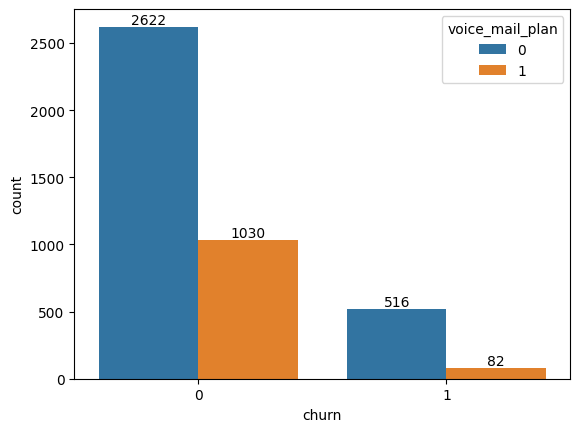

In [ ]:
ax = sns.countplot(x=df["churn"],
              hue=df["voice_mail_plan"])
for i in ax.containers:
    ax.bar_label(i,)

number_customer_service_calls

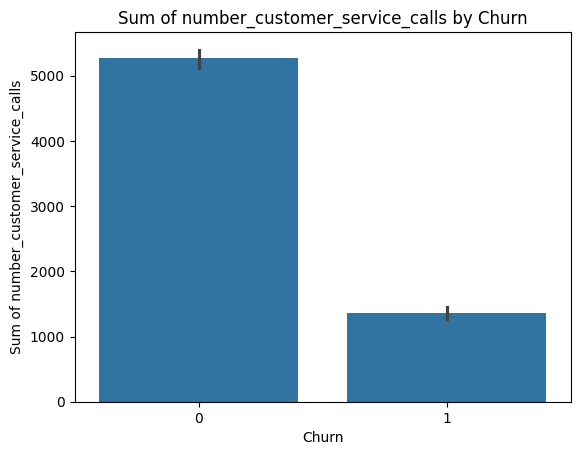

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_sum_with_target(num_col=None, target_col=None, data=None):
    if num_col is None or target_col is None or data is None:
        print("Please provide 'num_col', 'target_col', and 'data' parameters.")
        return

    fig = sns.barplot(x=target_col, y=num_col, data=data, estimator=sum)

    plt.xlabel('Churn')
    plt.ylabel('Sum of ' + num_col)
    plt.title('Sum of ' + num_col + ' by Churn')
    plt.show()

# Contoh pemanggilan fungsi
visualize_sum_with_target(num_col="number_customer_service_calls", target_col="churn", data=df)


total_eve_charge

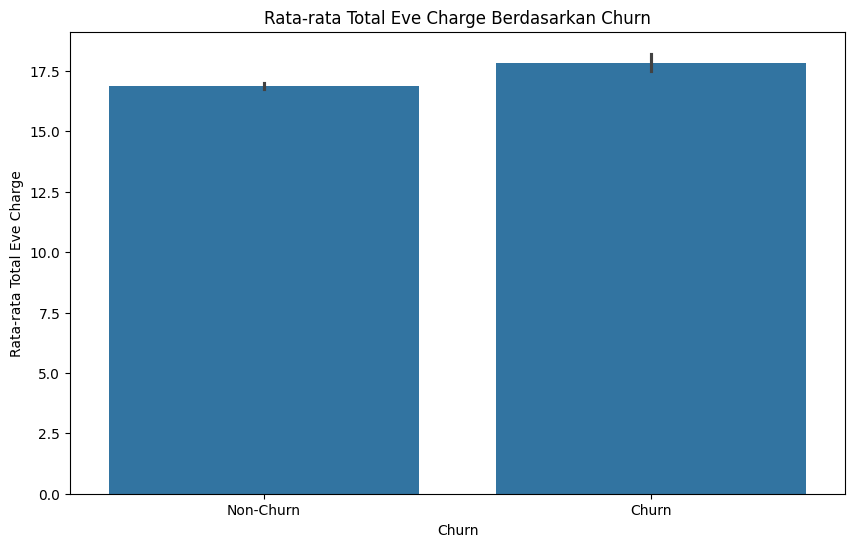

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='churn', y='total_eve_charge', data=df, estimator='mean')
plt.xlabel('Churn')
plt.ylabel('Rata-rata Total Eve Charge')
plt.title('Rata-rata Total Eve Charge Berdasarkan Churn')
plt.xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])
plt.show()

#**4. FEATURE ENGINEERING**

##Data Train

1. Mengecek Duplikasi data

In [ ]:
df.duplicated().sum()

0

Tidak ada data yang sama atau duplikat sehingga data sudah aman dari data yang sama.

2. Cek Missing Value

In [ ]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Tidak ada data yang kosong sehingga aman untuk digunakan.

3. Mengecek ada nya Noise

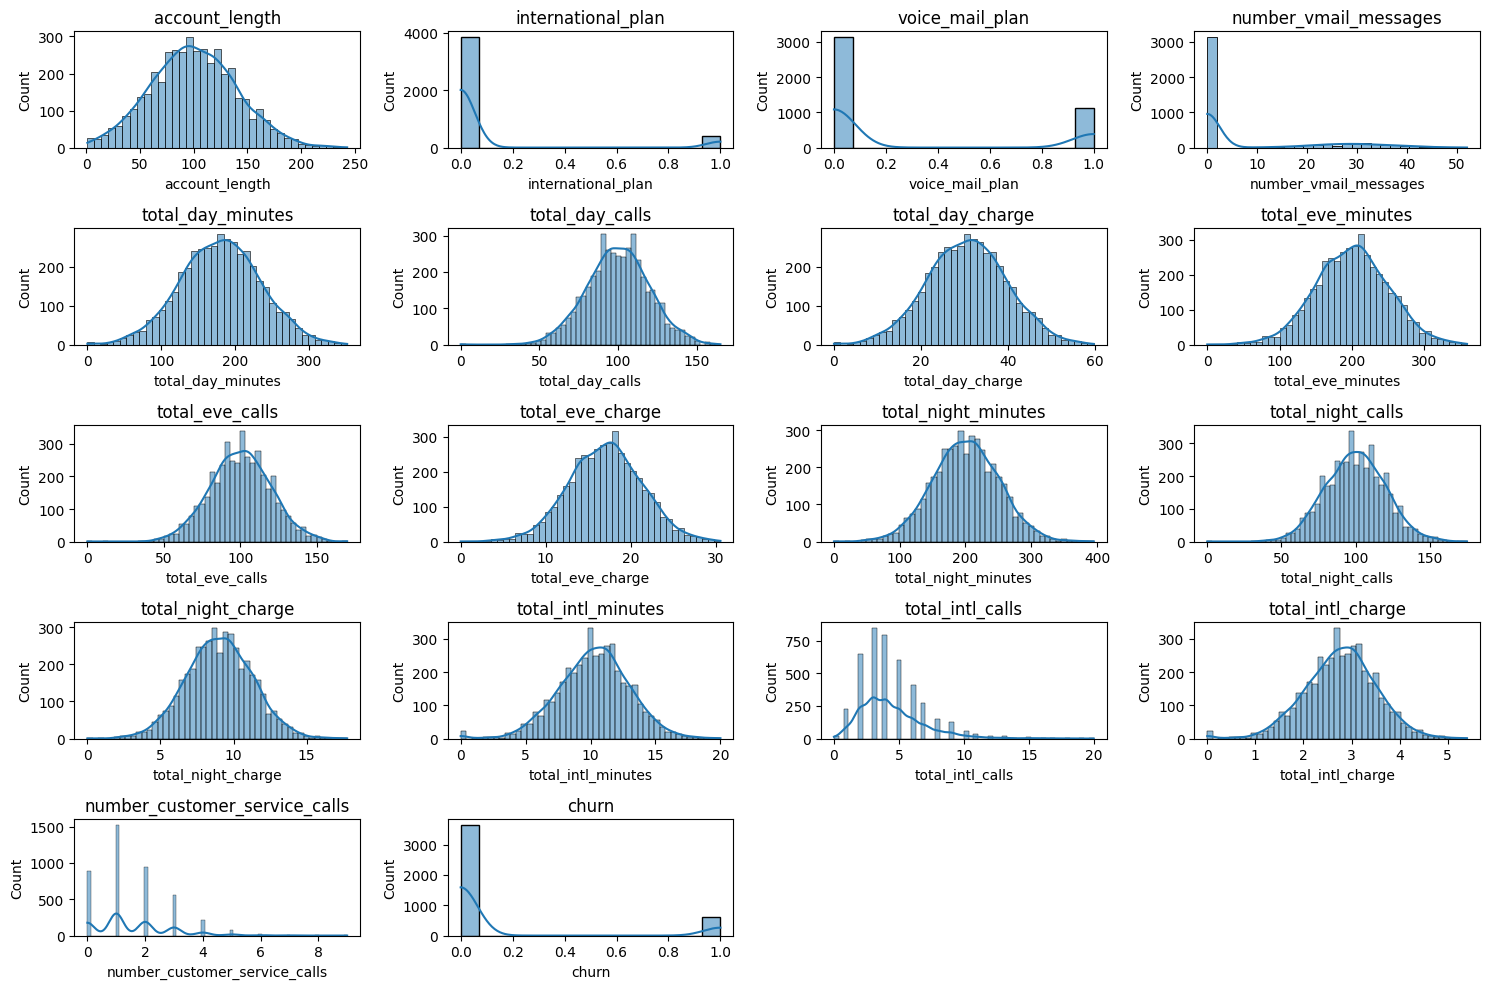

In [ ]:
df_numerik = df.select_dtypes(include = ['float64', 'int64'])
if not df_numerik.empty:
    n_rows = len(df_numerik.columns) // 4 + (len(df_numerik.columns) % 4 > 0)  # Membagi jumlah kolom dengan 4, menambahkan 1 jika ada sisa
    plt.figure(figsize=(15, 10))

    for i, col in enumerate(df_numerik.columns, 1):
        plt.subplot(n_rows, 4, i)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(col)

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame numerik kosong.")


berdasarkan hasil grafik diatas, terlihat tidak ada variabel yang memiliki nilai tidak wajar atau noise. Pada grafik total_int_calls memang terlihat tidak normal tetapi jika dilihat dari dataset yang digunakan bahwa besar kemungkinan terjadi.

##Data Test

1. Mengecek Duplikasi Data

In [ ]:
df2.duplicated().sum()

0

Tidak ada data yang sama atau duplikat sehingga data sudah aman dari data yang sama.

2. Mengecek Missing Value

In [ ]:
df2.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Tidak ada data yang kosong sehingga aman untuk digunakan.

#**5. MODELING**

In [ ]:
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

## 1. Membangun model dengan Target Mean Encoding

In [ ]:
def target_count_encoding(features, target, data_train=df):
    df_encoding = data_train.groupby(features)[target].count().reset_index(name=features+"_count")
    return df_encoding

def run_target_count_encoding(data=df, data_train=df):
    master_state = target_count_encoding(features="state", target="churn", data_train=data_train)
    master_area_code = target_count_encoding(features="area_code", target="churn", data_train=data_train)
    drop_col_check =  ["state_count", "area_code_count"]
    data.drop(drop_col_check, axis=1, errors="ignore", inplace=True)

    df_merge = pd.merge(data, master_state, on="state", how="left")
    df_merge = pd.merge(df_merge, master_area_code, on="area_code", how="left")

    return df_merge

In [ ]:
def pipeline_feature_preprocessing(data):
  drop_col = ["id","state","area_code"]
  data = data.drop(drop_col, axis=1,errors="ignore")
  return data

df = pipeline_feature_preprocessing(data=df)
df2 = pipeline_feature_preprocessing(data=df2)
print(df.shape, df2.shape)

(4250, 18) (750, 17)


In [ ]:
display(df.head(2))
display(df2.head())

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


##2. Memisahkan Train dan Test Data

In [ ]:
drop = []
target = ['churn']
x = df.drop(drop+target,axis=1)
y = df[target]
col_for_model = x.columns.tolist()
df_test = df2[col_for_model]
print(x.shape, y.shape)

(4250, 17) (4250, 1)


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

test_size = 0.33
seed = 42
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x,
                                                                  y,
                                                                  test_size=test_size,
                                                                  random_state=seed,
                                                                  stratify = y)
print("Data Train:",xTrain.shape, yTrain.shape)
print("Data Test:",xTest.shape, yTest.shape)

Data Train: (2847, 17) (2847, 1)
Data Test: (1403, 17) (1403, 1)


Membagi dataset tersebut  dengan proporsi 0.3 untuk data test dan data train 0.7 dengan data targetnya adalah churn. Untuk proporsi pembagian split relatif sesuai dengan kebutuhan karena tidak ada aturan baku untuk menentukan proporsi split.

##3. Training Model dengan Hyperparameter Tuning

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_nb = GaussianNB()

print("Run Logistics Regression")
model_lr.fit(xTrain, yTrain)
print("Run Decision Tree")
model_dt.fit(xTrain, yTrain)
print("Run Random Forest")
model_rf.fit(xTrain, yTrain)
print("Run Gradient Boosting")
model_gb.fit(xTrain, yTrain)
print("Run Naive Bayes")
model_nb.fit(xTrain, yTrain)

Run Logistics Regression
Run Decision Tree
Run Random Forest
Run Gradient Boosting
Run Naive Bayes


GaussianNB()

In [ ]:
model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb"]
train_result = []
test_result = []
for model in model_list:
  open_model = eval(model)
  result_train = open_model.score(xTrain,yTrain)
  result_test = open_model.score(xTest,yTest)
  train_result.append(result_train)
  test_result.append(result_test)

df_eval = pd.DataFrame()
df_eval["model"] = model_list
df_eval["acc_train"] = train_result
df_eval["acc_test"] = test_result
df_eval["prec_train"] = train_result
df_eval["prec_test"] = test_result
df_eval["recall_train"] = train_result
df_eval["recall_test"] = test_result
df_eval["auc_train"] = train_result
df_eval["auc_test"] = test_result
df_eval

,model,acc_train,acc_test,prec_train,prec_test,recall_train,recall_test,auc_train,auc_test
0,model_lr,0.857043,0.858874,0.857043,0.858874,0.857043,0.858874,0.857043,0.858874
1,model_dt,1.000000,0.916607,1.000000,0.916607,1.000000,0.916607,1.000000,0.916607
2,model_rf,1.000000,0.960798,1.000000,0.960798,1.000000,0.960798,1.000000,0.960798
3,model_gb,0.974359,0.953671,0.974359,0.953671,0.974359,0.953671,0.974359,0.953671
4,model_nb,0.876712,0.864576,0.876712,0.864576,0.876712,0.864576,0.876712,0.864576


# **6. PREDICTION**

## 1. Fitting Model dengan Gradien Boosting

Karena dataset yang digunakan tidak seimbang pada variabel target sehingga model yang cocok adalah Gradien Boosting

In [ ]:
model_churn = model_gb.fit(xTrain, yTrain)

## 2. Hasil Prediksi

In [ ]:
# data_testing = pd.read_csv('Churn-Data Test.csv')
prediksi_rd = model_churn.predict(df_test)
df2['churn']=prediksi_rd
print("Hasil Test Prediksi:", prediksi_rd)

Hasil Test Prediksi: [0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

In [ ]:
jumlah_0 = np.sum(prediksi_rd == 0)
jumlah_1 = np.sum(prediksi_rd == 1)

print("Jumlah 0:", jumlah_0)
print("Jumlah 1:", jumlah_1)

Jumlah 0: 664
Jumlah 1: 86


Terdapat 664 pelanggan yang diprediksi tetap bertahan (tidak churn) dan 86 pelanggan yang beralih (churn).

# **7. INTERPRETATION**


In [ ]:
df_imp = pd.DataFrame()
df_imp["features"] = xTrain.columns.tolist()
df_imp["importance"] = model_churn.feature_importances_
df_imp.sort_values("importance",ascending=False)

,features,importance
4,total_day_minutes,0.179191
16,number_customer_service_calls,0.158246
6,total_day_charge,0.130803
1,international_plan,0.084977
7,total_eve_minutes,0.082255
14,total_intl_calls,0.073323
13,total_intl_minutes,0.071357
9,total_eve_charge,0.066351
3,number_vmail_messages,0.042754
15,total_intl_charge,0.038427


Feature importance :
1. total_day_minutes
2. number_customer_service_calls
3. total_day_charge
4. international_plan